In [1]:
import pandas as pd 
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import numpy as np
import matplotlib.pyplot as plt

path = os.getcwd()

def ChangeNewsFormat(company_name):
    
    file_path = path + "/NewsData/" + company_name + "_news.csv"
    inputfile = company_name + "_news.csv"
    
    if inputfile == "Apple_news.csv":
        news_data = pd.read_csv(file_path,engine='python')
        #news_data = news_data.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)
    else:
        news_data = pd.read_csv(file_path,engine='python')

    date_list = {'Jan.': '01','Feb.': '02','Mar.': '03','Apr.': '04','May': '05','Jun.': '06',
                'Jul.': '07','Aug.': '08','Sep.': '09','Oct.': '10','Nov.': '11','Dec.': '12'}
 
    new_date_format = []
    for i in range(0,len(news_data)):
        date = news_data['news_dates'][i]
        date_str1 = date.split(",")
        
        if date_str1[1] == ' 2018':
            x = date_str1[0].split(" ")
            d_month = date_list[x[0]]
            d_day = x[1]
            new_date = "2018-" + str(d_month) + "-" + str(d_day)
            new_date_format.append(new_date)
        elif date_str1[1] == ' 2017':
            x = date_str1[0].split(" ")
            d_month = date_list[x[0]]
            d_day = x[1]
            new_date = "2017-" + str(d_month) + "-" + str(d_day)
            new_date_format.append(new_date)
        elif date_str1[1] == ' 2016':
            x = date_str1[0].split(" ")
            d_month = date_list[x[0]]
            d_day = x[1]
            new_date = "2016-" + str(d_month) + "-" + str(d_day)
            new_date_format.append(new_date)
        elif date_str1[1] == ' 2015':
            x = date_str1[0].split(" ")
            d_month = date_list[x[0]]
            d_day = x[1]
            new_date = "2015-" + str(d_month) + "-" + str(d_day)
            new_date_format.append(new_date)
        elif date_str1[1] == ' 2014':
            x = date_str1[0].split(" ")
            d_month = date_list[x[0]]
            d_day = x[1]
            new_date = "2014-" + str(d_month) + "-" + str(d_day)
            new_date_format.append(new_date)
        elif date_str1[1] == ' 2013':
            x = date_str1[0].split(" ")
            d_month = date_list[x[0]]
            d_day = x[1]
            new_date = "2013-" + str(d_month) + "-" + str(d_day)
            new_date_format.append(new_date)
        else:
            news_data = news_data.drop([i])
    
    
    news_data = news_data.drop(['news_dates'],axis=1)
    news_data = news_data.drop(['Unnamed: 0'],axis=1)
    
    news_data['date'] = new_date_format
    
    if inputfile == "Apple_news.csv":
        news_data = news_data.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)  
        
    news_data.to_csv( path + "/Remat_NewsData/r_" + company_name + "_news.csv" )
    print("success remat the news data.....")

def FindNewsIncrease(Price_path, News_path):
    Pp = Price_path
    Np = News_path
    price_Frame = pd.read_csv(Pp, header = None, 
                              names = ["Date", "open", "high", "low", "close", "volume", "changed", "changep", "adjclose","tradeval", "tradevol"]) 


    price_Frame = price_Frame.drop([0])
    price_Frame[["changed"]] = price_Frame[["changed"]].astype(float)

    increase = price_Frame[price_Frame["changed"] > 0] 
    decrease = price_Frame[price_Frame["changed"] < 0]

    news = pd.read_csv(Np, header = None, 
                             names = ["Num", "title", "details", "date"]) 

    news_Frame = news.drop([0])

    match = [] 
    match_num = []
    match_title = [] 
    match_details = []
    match_changed = []        

 
    
    for i in increase['Date']: 
        for j in range(1,len(news_Frame['date'])): 
            if i == news_Frame['date'][j]: 
                match.append(i)
                match_num.append(news_Frame['Num'][j])
                
    #for matchChanged
    for i in match:
        for j in range(1,len(price_Frame['changed'])):
            if i == price_Frame['Date'][j]:
                match_changed.append(price_Frame['changed'][j])

    for i in match_num:
        for j in range(1,len(news_Frame["Num"])):
            if i == news_Frame["Num"][j]:
                #match_news.append(news[mask])
                match_title.append(news_Frame["title"][j])
                match_details.append(news_Frame["details"][j])

    match_all = pd.DataFrame(match,columns={'Date'});
    match_all['changed'] = match_changed
    match_all["title"] = match_title
    match_all["details"] = match_details
    match_all.to_csv(path + "/Match_data/IncreaseNews.csv")
    print("Success match the IncreaseNews.....")

    
def FindNewsDecrease(Price_path, News_path):
    Pp = Price_path
    Np = News_path
    price_Frame = pd.read_csv(Pp, header = None, 
                                  names = ["Date", "open", "high", "low", "close", "volume", "changed", "changep", "adjclose","tradeval", "tradevol"]) 


    price_Frame = price_Frame.drop([0])
    price_Frame[["changed"]] = price_Frame[["changed"]].astype(float)

    increase = price_Frame[price_Frame["changed"] > 0] 
    decrease = price_Frame[price_Frame["changed"] < 0]

    news = pd.read_csv(Np, header = None, 
                                 names = ["Num", "title", "details", "date"]) 

    news_Frame = news.drop([0])

    match = [] 
    match_num = []
    match_title = [] 
    match_details = []
    match_changed = []        

    for i in decrease['Date']: 
        for j in range(1,len(news_Frame['date'])):
            if i == news_Frame['date'][j]:
                match.append(i)
                match_num.append(news_Frame['Num'][j])
    for i in match:
        for j in range(1,len(price_Frame['changed'])):
            if i == price_Frame['Date'][j]:
                match_changed.append(price_Frame['changed'][j])

    for i in match_num:
        for j in range(1,len(news_Frame["Num"])):
            if i == news_Frame["Num"][j]:
                #match_news.append(news[mask])
                match_title.append(news_Frame["title"][j])
                match_details.append(news_Frame["details"][j])
            
    match_all = pd.DataFrame(match,columns={'Date'});
    match_all['changed'] = match_changed
    match_all["title"] = match_title
    match_all["details"] = match_details               
    match_all.to_csv(path + "/Match_data/DecreaseNews.csv")
    print("Success match the DecreaseNews.....")
    
def evaluate(text,parameter):
    # If you have an error, uncoment the following line
    #nltk.download('vader_lexicon')
    sia = SentimentIntensityAnalyzer()
    # Setup lexicon based on stock market from csv
    stock_lex = pd.read_csv( path + '/lexicon_data/stock_lex.csv')
    stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
    stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
    stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
    stock_lex_scaled = {}
    for k, v in stock_lex.items():
        if v > 0:
            stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
        else:
            stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

    # Read the weights of the lexicon from csv based on the Loughran and McDonald lexicons
    # from https://sraf.nd.edu/textual-analysis/resources/#LM%20Sentiment%20Word%20Lists
    positive = []
    with open('lexicon_data/lm_positive.csv', 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            positive.append(row[0].strip())

    negative = []
    with open('lexicon_data/lm_negative.csv', 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            entry = row[0].strip().split(" ")
            if len(entry) > 1:
                negative.extend(entry)
            else:
                negative.append(entry[0])
    # Update the lexicon
    final_lex = {}
    post = float(parameter)
    nega = float(parameter - 0.2)
    final_lex.update({word:post for word in positive})
    final_lex.update({word:nega for word in negative})
    final_lex.update(stock_lex_scaled)
    final_lex.update(sia.lexicon)
    sia.lexicon = final_lex
    score = sia.polarity_scores(text)['compound']
    
    if score < nega:
        result = 'negative'
    else:
        result = 'positive'
        
    return (score, result)
def Analysis_step1(company_name,parameter):
    
    Price_path = path + "/StockData/" + company_name + "_stock_price.csv"
    News_path = path + "/Remat_NewsData/r_" + company_name +"_news.csv"
    
    print("Already Find the News & Stock data")
    
    FindNewsIncrease(Price_path, News_path)
    FindNewsDecrease(Price_path, News_path)

    Increase_data = pd.read_csv( path + "/Match_data/IncreaseNews.csv")
    Decrease_data = pd.read_csv( path + "/Match_data/DecreaseNews.csv")
    Increase_data = Increase_data.drop(['Unnamed: 0'],axis=1)
    Decrease_data = Decrease_data.drop(['Unnamed: 0'],axis=1)
    i_scores = []
    d_scores = []
    i_results = []
    d_results = []
    
    print("Start analysis news data,it might take few minutes.....")
    for i in range(len(Increase_data)):
        Increase_text = Increase_data['details'][i]
        score, result = evaluate(Increase_text,parameter)
        #bias = Increase_data['changed'][i]
        #score = float(score*bias)
        i_scores.append(score)
        i_results.append(result)
    for i in range(len(Decrease_data)):
        Decrease_text = Decrease_data['details'][i]
        score, result = evaluate(Decrease_text,parameter)
        #bias = Decrease_data['changed'][i]
        #score = float(score*bias)
        d_scores.append(score)
        d_results.append(result)
    print("Success Analysis the news details......")
    
    Increase_data['news_score'] = i_scores
    Increase_data['news_result'] = i_results 
    Decrease_data['news_score'] = d_scores
    Decrease_data['news_result'] = d_results
    
    In_mean = np.mean(i_scores)
    De_mean = np.mean(d_scores)
    
    Increase_data['average'] = In_mean
    Decrease_data['average'] = De_mean
        
    Increase_data.to_csv(path + "/Analysis_Result/" + company_name + "_In.csv")
    Decrease_data.to_csv(path + "/Analysis_Result/" + company_name + "_De.csv")
    print("Success build the result.......")
    
def Change_parameter(company_name,parameter):
    Increase_data = pd.read_csv( path + "/Analysis_Result/" + company_name + "_In.csv")
    Decrease_data = pd.read_csv( path + "/Analysis_Result/" + company_name + "_De.csv")
    
    Increase_data = Increase_data.drop(['news_result'],axis=1)
    Decrease_data = Decrease_data.drop(['news_result'],axis=1)
    
    I_news_results = []
    D_news_results = []
    
    post = float(parameter)
    nega = float(parameter)
    
    for i in range (0,len(Increase_data)):
        I_score = Increase_data['news_score'][i]
        
        if I_score < nega:
            I_result = 'negative'
        elif I_score > post:
            I_result = 'positive'
        #else:
            #I_result = 'neutral'
        I_news_results.append(I_result)
        
    for i in range (0,len(Decrease_data)):
        D_score = Decrease_data['news_score'][i]
        
        if D_score < nega:
            D_result = 'negative'
        elif D_score > post:
            D_result = 'positive'
        #else:
            #D_result = 'neutral'
        D_news_results.append(D_result)
    
    Increase_data["news_results"] = I_news_results
    Decrease_data["news_results"] = D_news_results
    
    Increase_label = Increase_data["news_results"].value_counts()
    Decrease_label = Decrease_data["news_results"].value_counts()
    
    I_positive = Increase_label['positive']
    I_negative = Increase_label['negative']
    #I_neutral = Increase_label['neutral']
    I = [I_positive,I_negative]
    
    D_positive = Decrease_label['positive']
    D_negative = Decrease_label['negative']
    #D_neutral = Decrease_label['neutral']   
    D = [D_positive,D_negative]

    #print("Analysis parameter is: " + str(float(parameter)))
    
    return (I, D)
def Analysis_step2(company_name):
    base = 0.2
    I_posi_label = []
    I_neut_label = []
    I_nega_label = []
    D_posi_label = []
    D_neut_label = []
    D_nega_label = []
    number = []
    I_rates = []
    D_rates = []
    
    
    for i in range(0,16):
        I, D = Change_parameter(company_name,base)
        I_posi_label.append(I[0])
        #I_neut_label.append(I[1])
        I_nega_label.append(I[1])
        
        D_posi_label.append(D[0])
        #D_neut_label.append(D[1])
        D_nega_label.append(D[1])
        number.append(base)
        I_rate = round(I[1]*100/(I[0]+I[1]),2) 
        D_rate = round(D[1]*100/(D[0]+D[1]),2)

        #if I_rate > 100:
            #I_rate = 100
        #if D_rate > 100:
            #D_rate = 100
        print("Bad news rate:", "In "+str(I_rate)+"% ", ",De "+str(D_rate)+"%")
        I_rates.append(I_rate)
        D_rates.append(D_rate)

        #print(I,D)
        base = base + 0.05
    width = 0.04
    plt.figure(figsize=(20,10))
    p1 = plt.bar(number,I_posi_label, width)
    #p2 = plt.bar(number,I_neut_label, width)
    p2 = plt.bar(number,I_nega_label, width)
    plt.legend((p1[0], p2[0]), ('Positive','Negative')) 
    plt.show
    
    plt.figure(figsize=(20,10))
    p1 = plt.bar(number,D_posi_label, width)
    #p2 = plt.bar(number,D_neut_label, width)
    p2 = plt.bar(number,D_nega_label, width)
    plt.legend((p1[0], p2[0]), ('Positive','Negative'))  
    plt.show
    return (I_rates, D_rates)

Bad news rate: In 8.72%  ,De 13.34%
Bad news rate: In 9.33%  ,De 15.07%
Bad news rate: In 10.7%  ,De 15.7%
Bad news rate: In 11.77%  ,De 16.8%
Bad news rate: In 13.15%  ,De 17.74%
Bad news rate: In 15.14%  ,De 19.0%
Bad news rate: In 16.82%  ,De 20.25%
Bad news rate: In 17.74%  ,De 21.82%
Bad news rate: In 19.72%  ,De 23.55%
Bad news rate: In 21.56%  ,De 25.9%
Bad news rate: In 24.46%  ,De 28.89%
Bad news rate: In 27.06%  ,De 31.24%
Bad news rate: In 31.8%  ,De 35.64%
Bad news rate: In 40.83%  ,De 41.13%
Bad news rate: In 52.6%  ,De 52.28%
Bad news rate: In 72.17%  ,De 68.76%


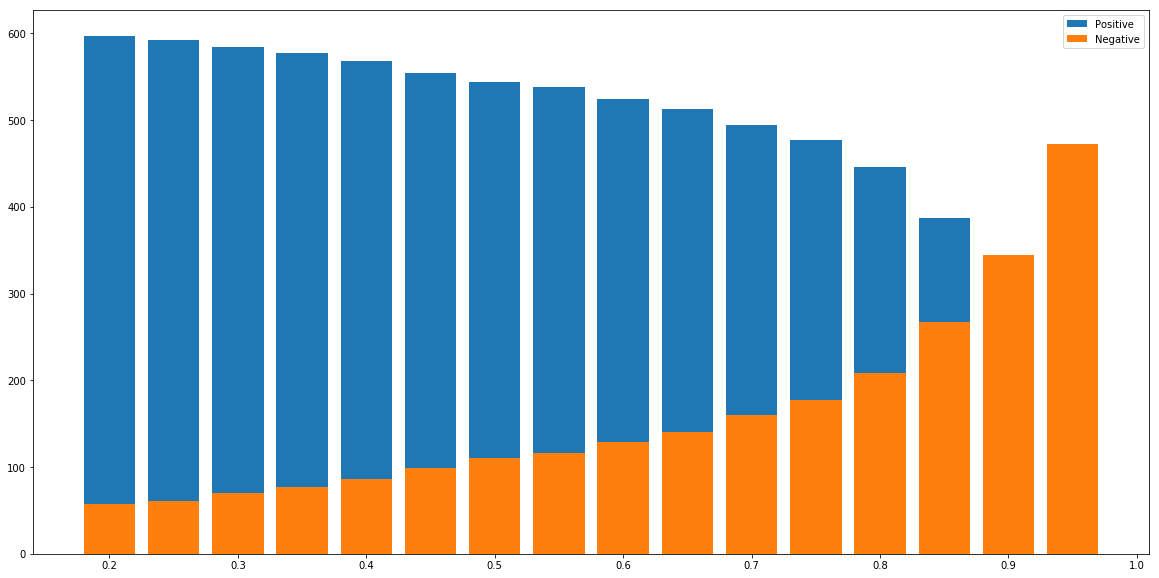

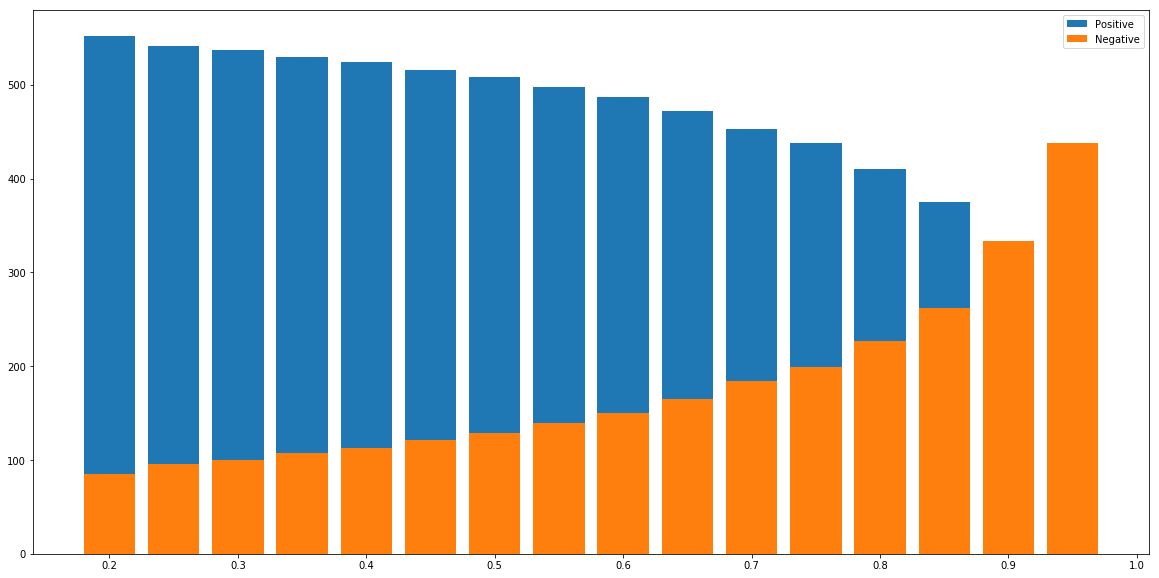

In [2]:
company = "Tesla"
#ChangeNewsFormat(company)
#Analysis_step1(company,0.2)
I_rates, D_rates = Analysis_step2(company)

#data = pd.read_csv("Analysis results.csv")
#data["In_rate_"+ str(company)] = I_rates
#data["De_rate_"+ str(company)] = D_rates
#data.to_csv("Analysis results.csv")